# EDA With Words
---

## Contents
---
- [Data Retrieval and Vectorizing](#Data-Retrieval-and-Vectorizing)
- [Most Popular Words, Bigrams, and Trigrams](#Most-Popular-Words,-Bigrams,-and-Trigrams)
- [Most Popular Goulet Pens Brands](#Most-Popular-Goulet-Pens-Brands)

## Data Retrieval and Vectorizing
___

In [107]:
# Relevent Imports
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [108]:
# Pull in data
text_processed_corpus = pd.read_csv('./data/text_processed_corpus.csv')
text_processed_corpus

,subreddit,processed_text
0,1,traveling journal fountainpens approve moderat...
1,1,need simple reminder
2,1,confess wrong kaweco hobby decade especially l...
3,1,cheap fountain pen well cheap pen zero problem...
4,1,literally classic design beautiful stripe engr...
...,...,...
2791,0,pen pick
2792,0,want pen idea
2793,0,look id left pen image find
2794,0,current rotation complaint


In [109]:
# Filter out for just the processed text
processed_words = text_processed_corpus['processed_text']

In [110]:
#Vectorize words for EDA
cvec = CountVectorizer(max_features = 2000)

#Fit and transform the status column
word_vectors = cvec.fit_transform(processed_words)

#create a dataframe of vectors and columns representing the words
word_vec_df = pd.DataFrame(word_vectors.todense(),
                     columns = cvec.get_feature_names_out())


word_vec_df.head()

,able,absolute,absolutely,accent,accept,accessory,accidentally,acid,acquire,acroball,...,yoseka,young,youtube,yu,yukari,zebra,zento,zero,zirc,zoom
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Most Popular Words, Bigrams, and Trigrams
___

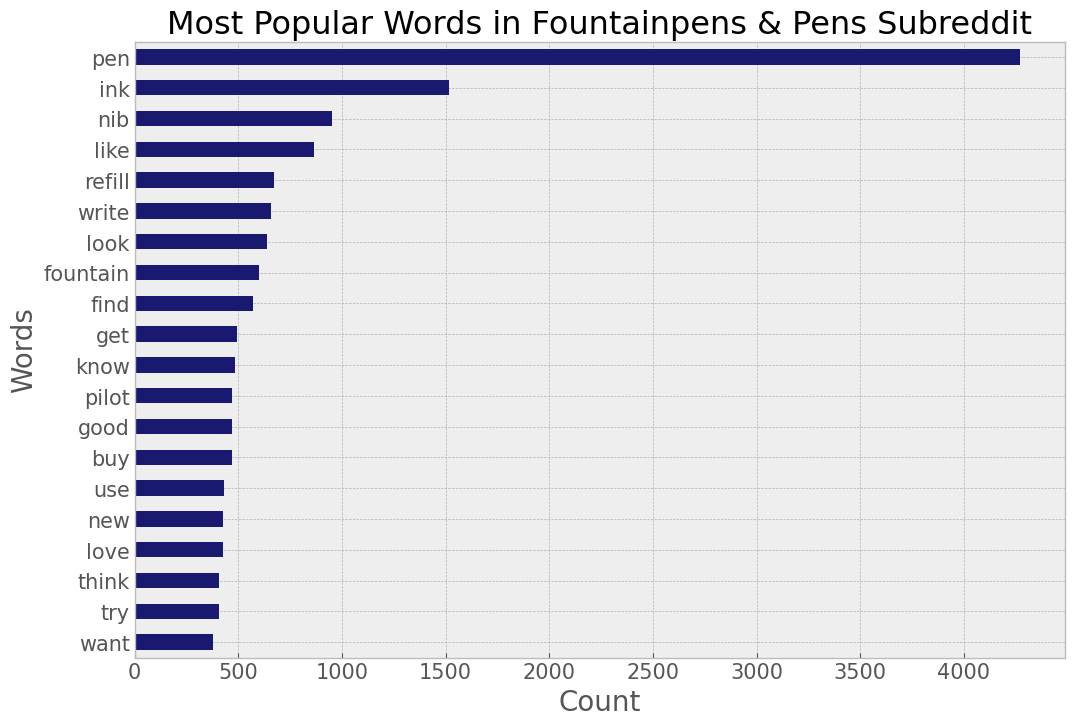

In [111]:
#Plot for most popular words in corpus

# Plot Settings
plt.figure(figsize = (12,8))
plt.style.use('bmh')
plt.tight_layout()

#Plot
word_vec_df.sum().sort_values(ascending = True).tail(20).plot(kind = 'barh', color = 'midnightblue')

#Plot labels
plt.ylabel('Words', size = 20)
plt.yticks(fontsize = 15)
plt.xlabel('Count', size = 20)
plt.xticks(fontsize = 15)
plt.title('Most Popular Words in Fountainpens & Pens Subreddit', size = 23)

#Save and export
plt.savefig('../project-3/plot_images/most_popular_words.png', dpi = 192);


In [121]:
# Create, fit, and transform a vectorizer that only considers bigrams
bigram_cvec = CountVectorizer(max_features = 2000, ngram_range = (2,2))
bigram_vectors = bigram_cvec.fit_transform(processed_words)

#create a dataframe of bigram vectors and columns representing the words
bigram_vec_df = pd.DataFrame(bigram_vectors.todense(),
                     columns = bigram_cvec.get_feature_names_out())


bigram_vec_df.head()

,able find,able help,able use,absolute favorite,absolutely love,acid free,acroball color,action pen,actual ink,actually like,...,year get,year love,year old,year use,year want,youtube video,yu yake,zebra blen,zebra pen,zebra sarasa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


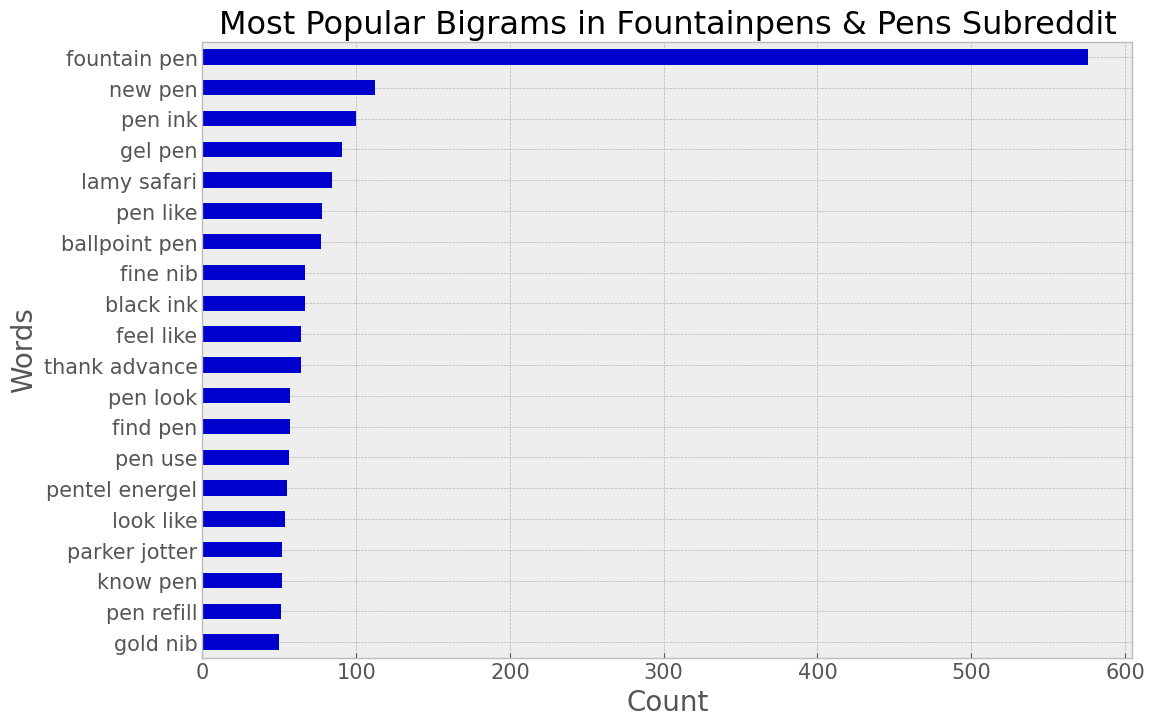

In [122]:
# Plot for most popular bigrams in set

# Plot Settings
plt.figure(figsize = (12,8))
plt.style.use('bmh')
plt.tight_layout()

#Plot
bigram_vec_df.sum().sort_values(ascending = True).tail(20).plot(kind = 'barh', color = 'mediumblue')

#Plot labels
plt.ylabel('Words', size = 20)
plt.yticks(fontsize = 15)
plt.xlabel('Count', size = 20)
plt.xticks(fontsize = 15)
plt.title('Most Popular Bigrams in Fountainpens & Pens Subreddit', size = 23)

#Save and export
plt.savefig('../project-3/plot_images/most_popular_bigrams.png', dpi = 192);


In [132]:
# Trigrams!
trigram_cvec = CountVectorizer(max_features = 2000, ngram_range = (3,3))
trigram_vectors = trigram_cvec.fit_transform(processed_words)

#create a dataframe of trigram vectors and columns representing the words
trigram_vec_df = pd.DataFrame(trigram_vectors.todense(),
                     columns = trigram_cvec.get_feature_names_out())


trigram_vec_df.head()

,aaand course leak,absolute favorite pen,absolutely love pen,acroball color acroball,amp pencil set,antique glass amp,antoine de saint,ask fountain pen,bad case scenario,ball jotter refill,...,way pen feel,world fountain pen,write fountain pen,write like dream,write super smooth,yama budo pilot,year ago start,zebra sarasa clip,zebra sarasa dry,zebra sarasa grand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


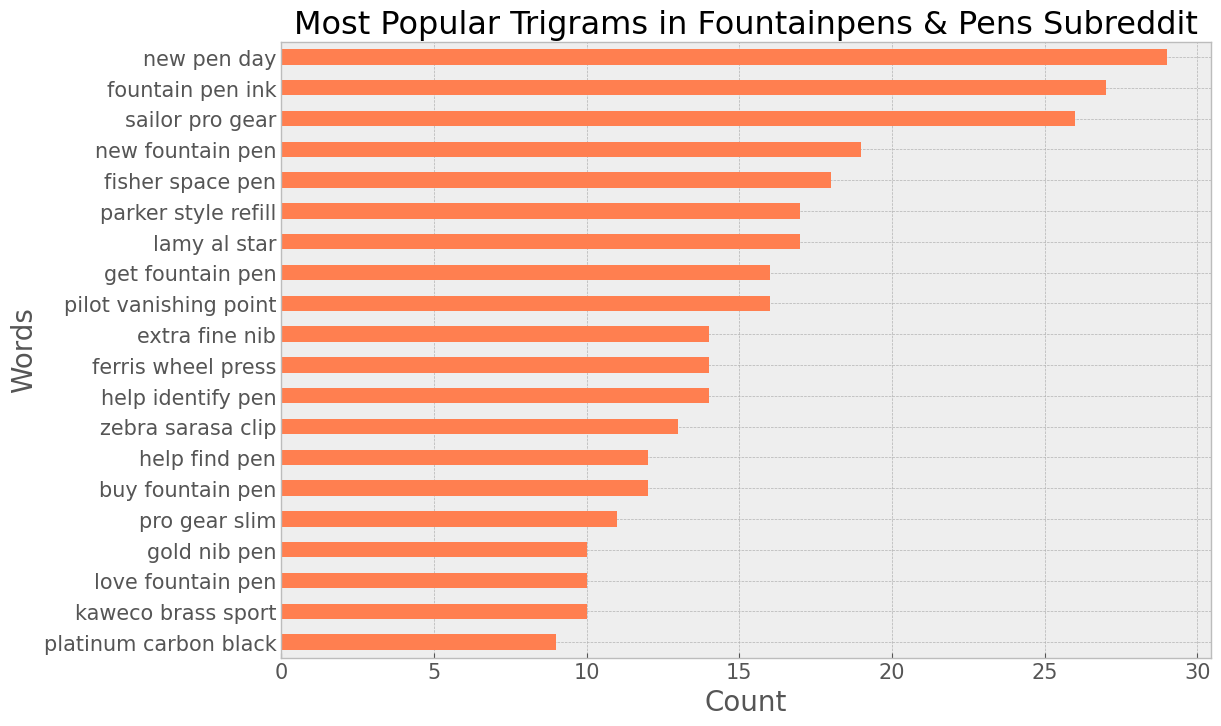

In [133]:
# Plot for most popular trigrams in set

# Plot Settings
plt.figure(figsize = (12,8))
plt.style.use('bmh')
plt.tight_layout()

#Plot
trigram_vec_df.sum().sort_values(ascending = True).tail(20).plot(kind = 'barh', color = 'coral')

#Plot labels
plt.ylabel('Words', size = 20)
plt.yticks(fontsize = 15)
plt.xlabel('Count', size = 20)
plt.xticks(fontsize = 15)
plt.title('Most Popular Trigrams in Fountainpens & Pens Subreddit', size = 23)

#Save and export
plt.savefig('../project-3/plot_images/most_popular_trigrams.png', dpi = 192);


## Most Popular Goulet Pens Brands
___

In [114]:
# Filter out for brands available to purchase from Goulet Pens

pen_brands = ['pilot','twsbi', 'esterbrook', 'lamy', 'kaweco', 'visconti',
             'goulet', 'pelikan', 'platinum', 'sheaffer', 'herbin', 'namiki', 'noodler', 'opus', 'sailor', 'rhodia',
             'oster', 'diamine', 'iroshizuku', 'monteverde']

pen_brands_count = word_vec_df[pen_brands].sum()

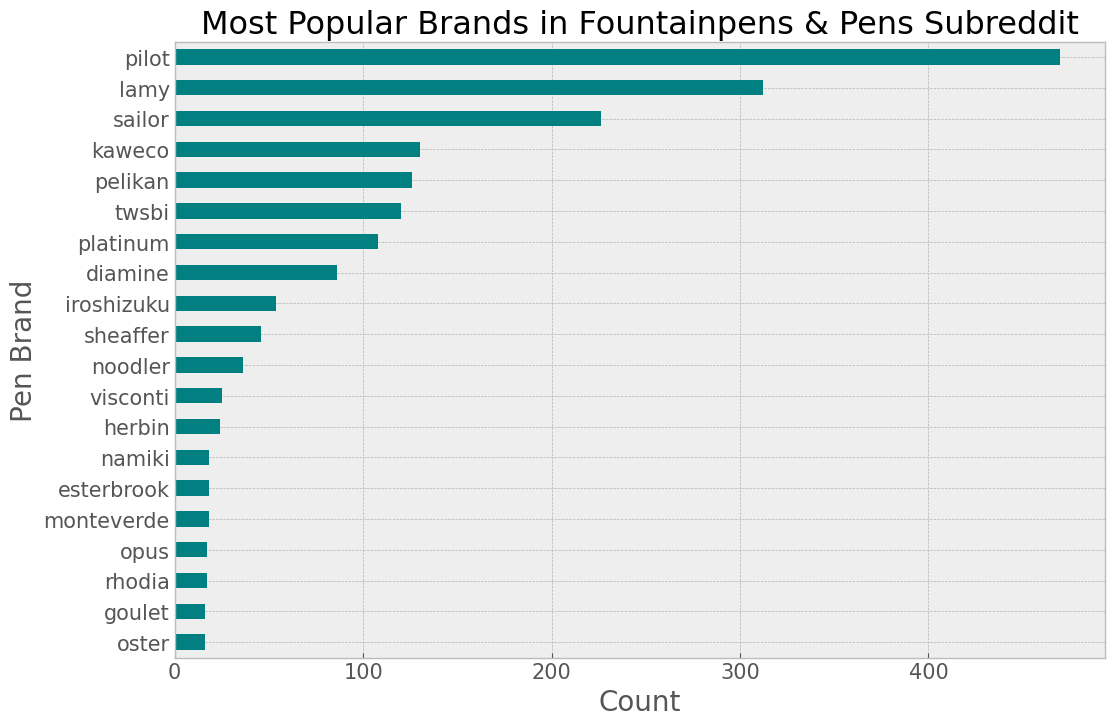

In [115]:
#Plot for most popular brands

# Plot Settings
plt.figure(figsize = (12,8))
plt.style.use('bmh')
plt.tight_layout()

#Plot
pen_brands_count.sort_values(ascending = True).plot(kind = 'barh', color = 'teal')

#Plot labels
plt.ylabel('Words', size = 20)
plt.yticks(fontsize = 15)
plt.xlabel('Count', size = 20)
plt.xticks(fontsize = 15)
plt.title('Most Popular Brands in Fountainpens & Pens Subreddit', size = 23)

plt.ylabel('Pen Brand'.title())

#Save and export
plt.savefig('../project-3/plot_images/most_popular_brands.png', dpi = 192);